In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the data set

In [2]:
data = pd.read_csv('KHMtest2.csv')
data.head()

,position,sensor1,sensor2,sensor3,sensor4,sensor5
0,0,655,650,652,1546,1524
1,1,658,653,528,1522,1513
2,2,660,648,644,1507,1492
3,3,659,650,633,1490,1474
4,4,658,645,605,1471,1458


Calculate mean of different measures for each sensor.

In [3]:
data_mean = data.groupby('position').mean()
data_mean.head()

,sensor1,sensor2,sensor3,sensor4,sensor5
position,,,,,
0,635.983740,628.146341,612.699187,1360.731707,1307.804878
1,638.162602,628.487805,616.943089,1355.666667,1293.105691
2,638.186992,628.121951,616.146341,1359.365854,1290.837398
3,639.512195,629.943089,618.195122,1363.886179,1302.796748
4,636.414634,630.658537,615.520325,1365.902439,1301.894309


## Analyzing Mean Values for Each Sensor

Plot mean values for each sensor.

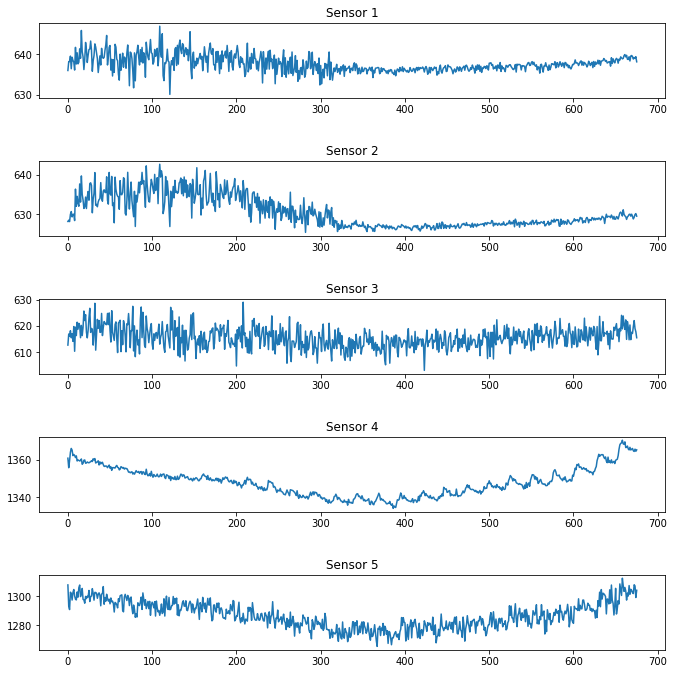

In [4]:
plt.rcParams["figure.figsize"] = (10,10)
for i , column in enumerate(data_mean.columns, 1):
    plt.subplot(5,1,i)
    plt.plot(data_mean[column])
    plt.title('Sensor {}'.format(i))
    plt.tight_layout(pad = 3)

Note: There seems to be some systematic error on sensor 4 which is no present on the other sensors. Other sensors might have some noise added, maybe some filtering can be performed?

## Analyzing Data for Each Sensor
This section plots 13 sensor measurements on a different graph and compares that measurement with the mean measure of all measures. For example, plot number 1 compares the first measurement of sensor 1 with the mean measurement value, plot number 2 compares the second measurement of sensor 1 with the mean measurement value, and so on.

In [5]:
sensor_name = 'sensor1' #change to sensor_n

sensor = pd.DataFrame()
for i in range(123):
    sensor[i] = data.iloc[i*26*26:(i+1)*26*26][sensor_name].values

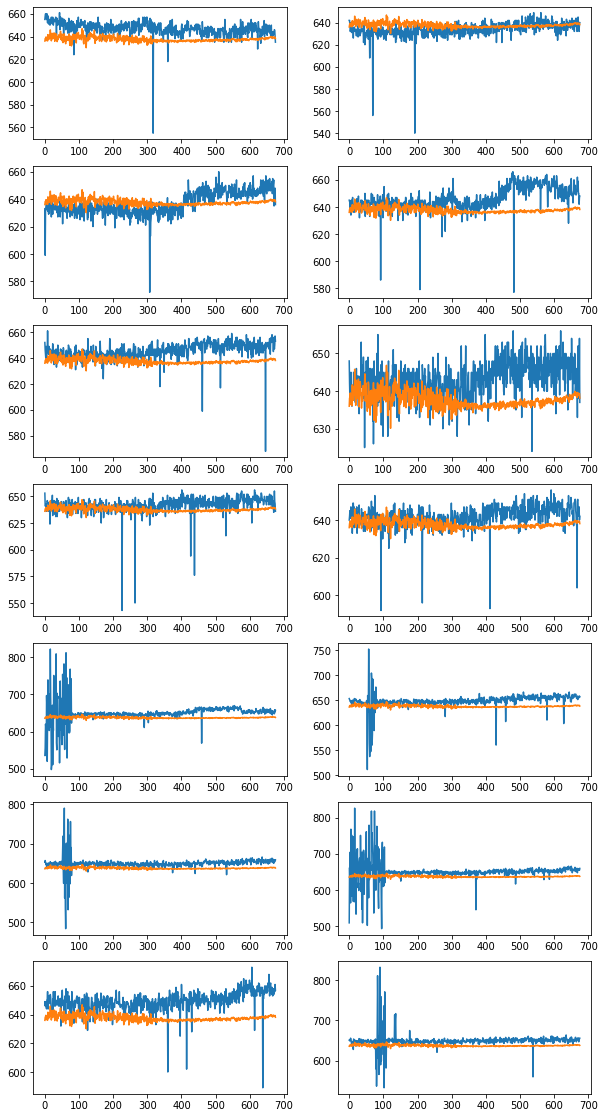

In [6]:
plt.rcParams["figure.figsize"] = (10,20)

for i , column in enumerate(sensor.columns[0:14], 0):
    plt.subplot(7,2,i+1)
    plt.plot(sensor[column])
    plt.plot(data_mean[sensor_name])
    #plt.ylim([550, 700])


## What Sensor Sees?
The following part shows what the sensor sees in a 26 by 26 grid.

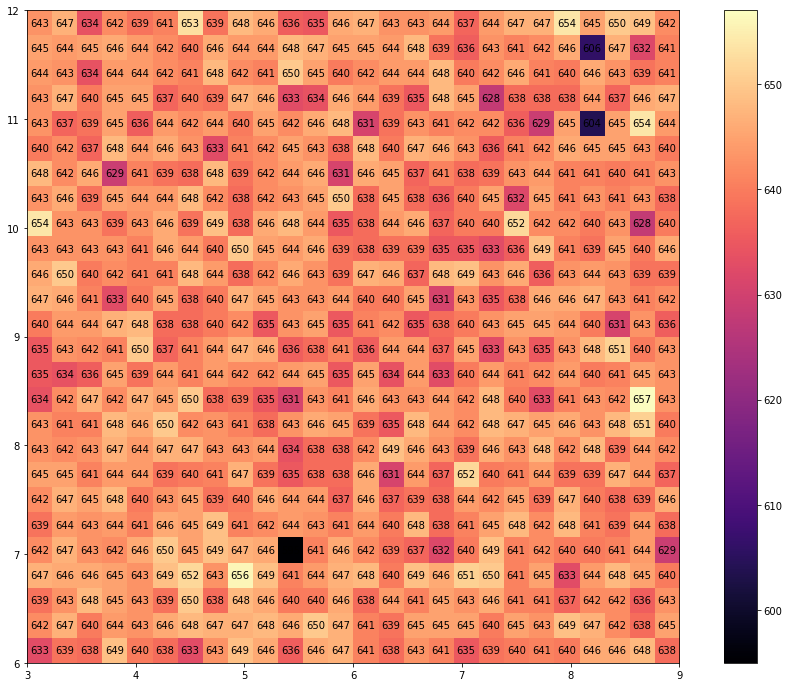

In [9]:
sensor_name = 'sensor2' #change to sensor_n
sample = 25

use_mean_value = False #Change to True to use mean value of sensor.

if use_mean_value==False:
    values = sensor[sample].values.reshape(26,26)
else: 
    values = data_mean[sensor_name].values.reshape(26,26)

size = 26

# Limits for the extent
x_start = 3.0
x_end = 9.0
y_start = 6.0
y_end = 12.0

extent = [x_start, x_end, y_start, y_end]

# The normal figure
fig = plt.figure(figsize=(16, 12))
ax = fig.add_subplot(111)
im = ax.imshow(values, extent=extent, origin='lower', interpolation='None', cmap='magma')

# Add the text
jump_x = (x_end - x_start) / (2.0 * size)
jump_y = (y_end - y_start) / (2.0 * size)
x_positions = np.linspace(start=x_start, stop=x_end, num=size, endpoint=False)
y_positions = np.linspace(start=y_start, stop=y_end, num=size, endpoint=False)

for y_index, y in enumerate(y_positions):
    for x_index, x in enumerate(x_positions):
        label = values[y_index, x_index]
        text_x = x + jump_x
        text_y = y + jump_y
        ax.text(text_x, text_y, int(label), color='black', ha='center', va='center')

fig.colorbar(im)
plt.show()